<a href="https://colab.research.google.com/github/champsleague/ComputerVision/blob/main/CV_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Size =  (512, 512, 3)
Pixel Intensity Value =  [ 67  45 148]

 Color Image


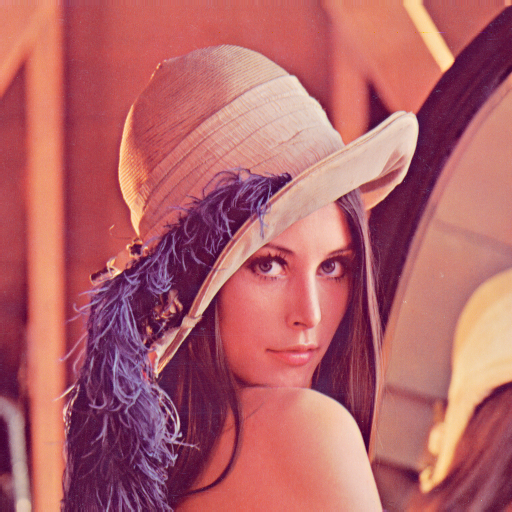


 Gray Image


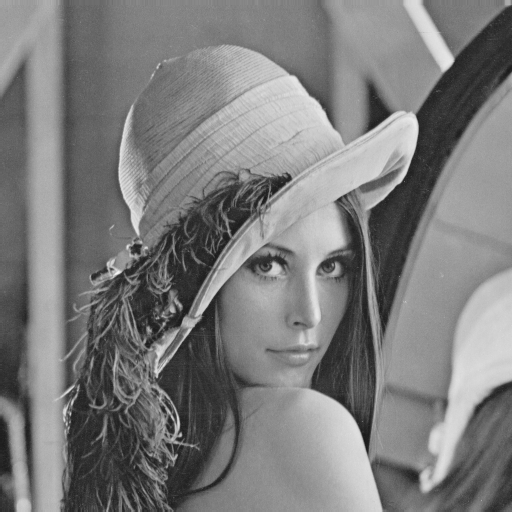


 Cropped Image


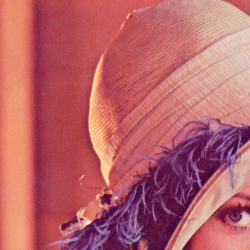

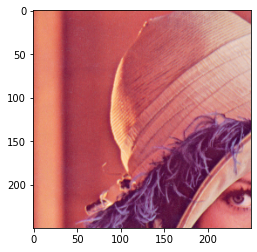

In [ ]:
# [Lab 2-1] Simple Image Processing

import cv2 as cv
import sys
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

img=cv.imread('lena_color.png')

if img is None:
  sys.exit("cannot find file")

print("Image Size = ",img.shape)
h,w,c = img.shape

print('Pixel Intensity Value = ',img[100,70])


# OpenCV --> BGR Image

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

roi = img[50:300, 30:280]

print('\n',"Color Image")
cv2_imshow(img)

print('\n','Gray Image')
cv2_imshow(gray)

print('\n','Cropped Image')
cv2_imshow(roi)


# matplotlib --> RGV Image

RGB_img = cv.cvtColor(img,cv.COLOR_BGR2RGB) #convert color space from BGR to RGB
RGB_roi = RGB_img[50:300, 30:280]
roi = img[50:300, 30:280]  # image cropping (ROI extraction by slicing)

plt.imshow(RGB_roi)
plt.show()

cv.waitKey()
cv.destroyAllWindows()

Image Size =  (512, 512, 3)
Pixel Intensity Value =  [ 67  45 148]


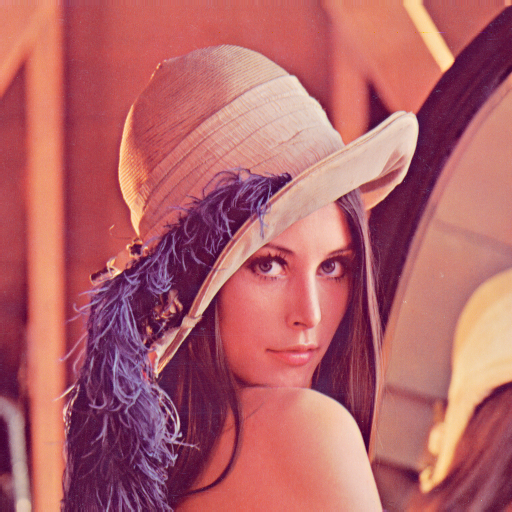

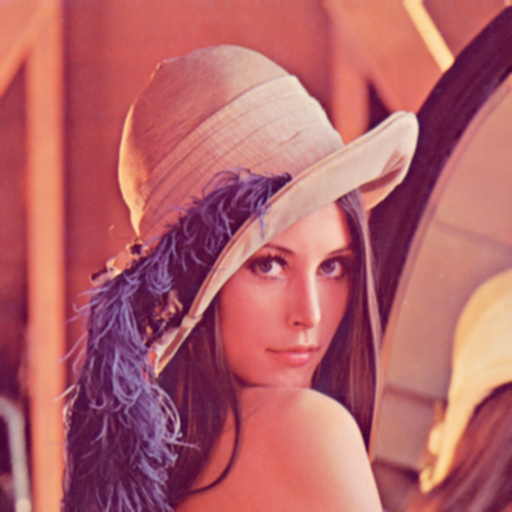

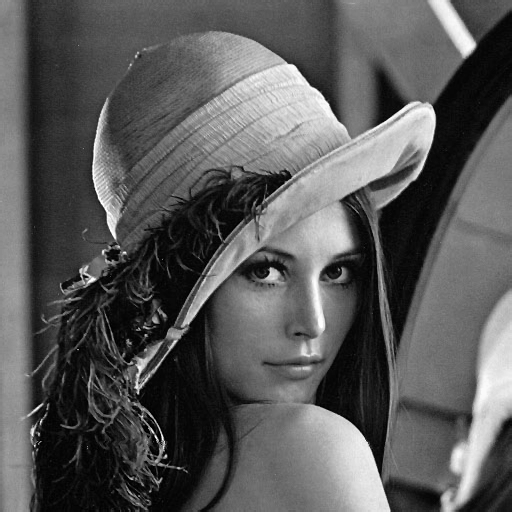

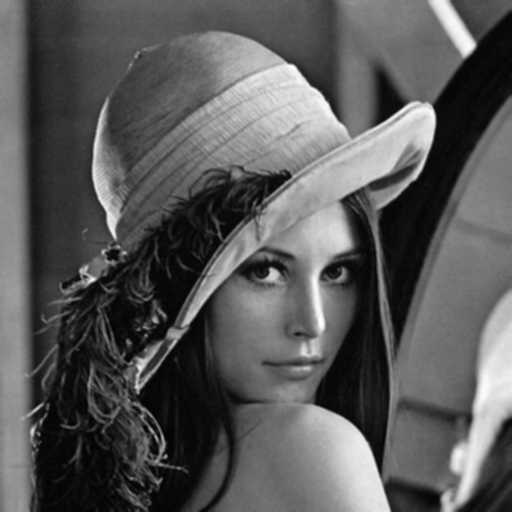

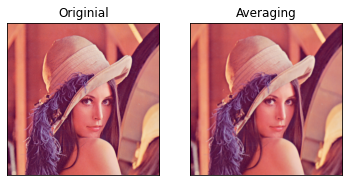

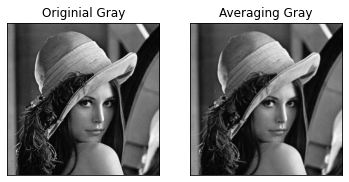

In [ ]:
# [Lab 2-2] Image Smoothing

import cv2 as cv
import sys
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

img=cv.imread('lena_color.png')
gray=cv.imread('lena_gray.png')

if img is None:
  sys.exit("cannot find file")

print("Image Size = ",img.shape)
h,w,c = img.shape

print('Pixel Intensity Value = ',img[100,70])


# Image Blurring (Image Smoothing) using 2D convolution (image filtering)

# 1. Averaging

# OpenCV --> BGR Image

kernel = np.ones((3,3),np.float32)/9 # kernal setting
dst = cv.filter2D(img,-1,kernel) # output image
dst_gray = cv.filter2D(gray,-1,kernel) # output image

cv2_imshow(img)
cv2_imshow(dst)
cv2_imshow(gray)
cv2_imshow(dst_gray)


# matplotlib --> RGB Image

RGB_img = cv.cvtColor(img,cv.COLOR_BGR2RGB) #convert color space from BGR to RGB

kernel = np.ones((5,5),np.float32)/25 # kernal setting
dst2 = cv.filter2D(RGB_img,-1,kernel) # output image (opencv is applied)
dst2_gray = cv.filter2D(gray,-1,kernel) # output image (opencv is applied)

plt.subplot(121),plt.imshow(RGB_img),plt.title('Originial')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(dst2),plt.title('Averaging')
plt.xticks([]),plt.yticks([])
plt.show()

plt.subplot(121),plt.imshow(gray),plt.title('Originial Gray')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(dst2_gray),plt.title('Averaging Gray')
plt.xticks([]),plt.yticks([])
plt.show()

cv.waitKey()
cv.destroyAllWindows()

Original Image


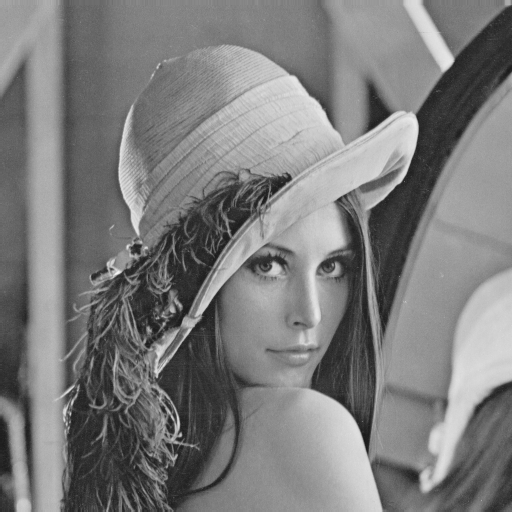


 Gaussian Image sigma = 1 with 5x5


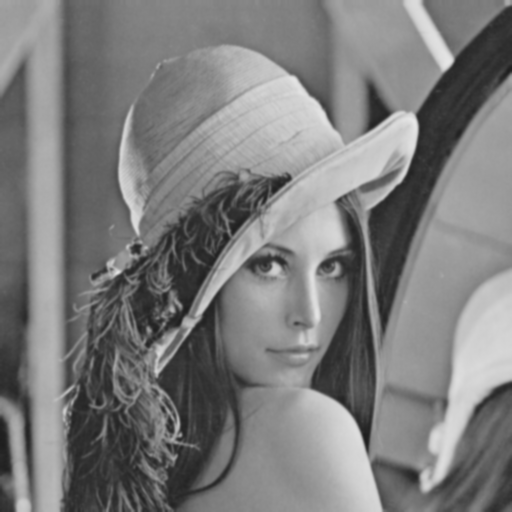


 Gaussian Image sigma = 3 with 5x5


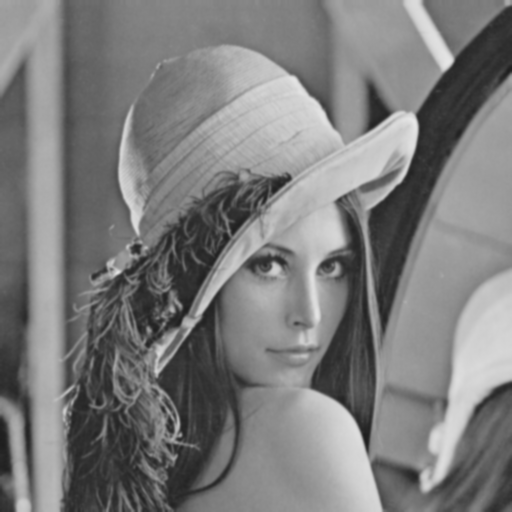


 Gaussian Image sigma = 7


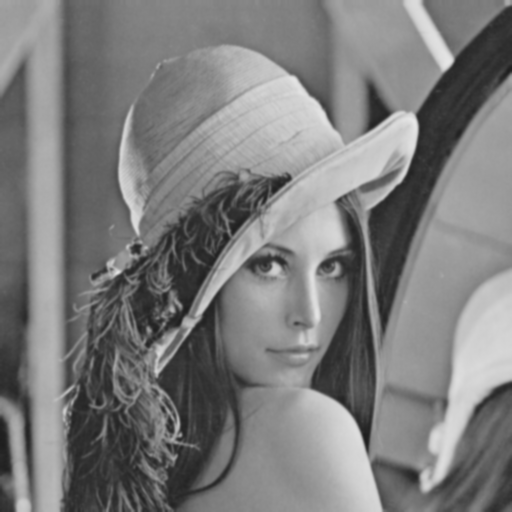

---------------------------------------------------------------------


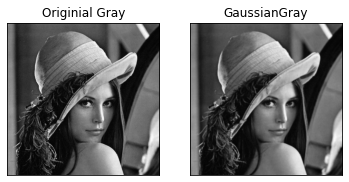

In [ ]:
# Gaussian Blurring

import cv2 as cv
import sys
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

img=cv.imread('lena_color.png')

if img is None:
  sys.exit("cannot find file")


# Image Blurring (Image Smoothing) using 2D convolution (image filtering)

# 2. Gaussian Blurring

# OpenCV --> BGR Image

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

dst = cv.GaussianBlur(gray,(5,5),1) # output image (Sigma = 3)
dst2 = cv.GaussianBlur(gray,(5,5),1) # output image (Sigma = 10)
dst3 = cv.GaussianBlur(gray,(5,5),1) # output image (Sigma = 5) Size is dependent on sigma

print("Original Image")
cv2_imshow(gray)

print("\n",'Gaussian Image sigma = 1 with 5x5')
cv2_imshow(dst)

print("\n",'Gaussian Image sigma = 3 with 5x5')
cv2_imshow(dst2)

print("\n",'Gaussian Image sigma = 7')
cv2_imshow(dst3)

print("---------------------------------------------------------------------")

# matplotlib --> RGB Image

gray = cv.imread('lena_gray.png')

dst_gray = cv.GaussianBlur(gray,(5,5),1) # output image (Sigma = 3)

plt.subplot(121),plt.imshow(gray),plt.title('Originial Gray')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(dst_gray),plt.title('GaussianGray')
plt.xticks([]),plt.yticks([])
plt.show()

cv.waitKey()
cv.destroyAllWindows()

In [ ]:
# [Lab 2-3] Image Gradients

import cv2 as cv
import sys
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

img=cv.imread('lena_gray.png')

sobelx = cv.Sobel(img,-1,1,0,3)
sobely = cv.Sobel(img,-1,0,1,3)

abs_grad_x = cv.convertScaleAbs(sobelx)
abs_grad_y = cv.convertScaleAbs(sobely)
sobel = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

mask = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobel,cmap = 'gray')
plt.title('Sobel'),plt.xticks([]),plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'),plt.xticks([]),plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'),plt.xticks([]),plt.yticks([])